In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

## Step 1 - Gathering and Exploring Data

Let us first download the data for 3 ETFs.

In [22]:
equity = yf.Ticker("SPY").history(start="2018-01-01", end="2022-12-30")
crude_oil = yf.Ticker("DBO").history(start="2018-01-01", end="2022-12-30")
gold = yf.Ticker("GLD").history(start="2018-01-01", end="2022-12-30")

In [20]:
equity.head() #first look at the data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2018-01-02 00:00:00-05:00,239.163353,240.029499,238.770460,239.993774,86655700,0.0,0.0,0.0
2018-01-03 00:00:00-05:00,240.163472,241.663621,240.163472,241.511810,90070400,0.0,0.0,0.0
2018-01-04 00:00:00-05:00,242.163630,243.020839,241.574291,242.529709,80636400,0.0,0.0,0.0
2018-01-05 00:00:00-05:00,243.333377,244.270947,242.833337,244.145950,83524000,0.0,0.0,0.0
2018-01-08 00:00:00-05:00,244.047704,244.753129,243.753047,244.592407,57319200,0.0,0.0,0.0


In [24]:
crude_oil.head() #fist look at the data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2018-01-02 00:00:00-05:00,8.952833,8.970388,8.917724,8.944056,155000,0.0,0.0,0.0
2018-01-03 00:00:00-05:00,9.014275,9.137156,9.014275,9.137156,216000,0.0,0.0,0.0
2018-01-04 00:00:00-05:00,9.137156,9.181042,9.119602,9.154711,184600,0.0,0.0,0.0
2018-01-05 00:00:00-05:00,9.084493,9.128379,9.049384,9.110825,307700,0.0,0.0,0.0
2018-01-08 00:00:00-05:00,9.119603,9.172266,9.093270,9.163488,183400,0.0,0.0,0.0


In [26]:
gold.head() #first look at the gold data etf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2018-01-02 00:00:00-05:00,124.660004,125.180000,124.389999,125.150002,11762500,0.0,0.0,0.0
2018-01-03 00:00:00-05:00,125.050003,125.089996,124.099998,124.820000,7904300,0.0,0.0,0.0
2018-01-04 00:00:00-05:00,124.889999,125.849998,124.739998,125.459999,7329700,0.0,0.0,0.0
2018-01-05 00:00:00-05:00,124.930000,125.480003,124.830002,125.330002,5739900,0.0,0.0,0.0
2018-01-08 00:00:00-05:00,125.199997,125.320000,124.900002,125.309998,3566700,0.0,0.0,0.0


Let us collect the closing prices for all these 3 ETFs.

In [29]:
equity = equity["Close"]
crude_oil = crude_oil["Close"]
gold = gold["Close"]

Now let us take a look at the summary statistics for all 3 series separately

In [32]:
equity.describe()

count    1258.000000
mean      322.447862
std        69.248757
min       207.917862
25%       258.995544
50%       304.351715
75%       387.025780
max       457.181549
Name: Close, dtype: float64

In [34]:
crude_oil.describe()

count    1258.000000
mean       10.410812
std         3.044787
min         4.713807
25%         8.480900
50%         9.741605
75%        11.936356
max        19.109047
Name: Close, dtype: float64

In [36]:
gold.describe()

count    1258.000000
mean      150.921431
std        22.501465
min       111.099998
25%       125.865000
50%       159.434998
75%       169.345005
max       193.889999
Name: Close, dtype: float64

Let us try to visualize the time series for all three ETFs.

Text(0.5, 1.0, 'SPY ETF Closing Prices')

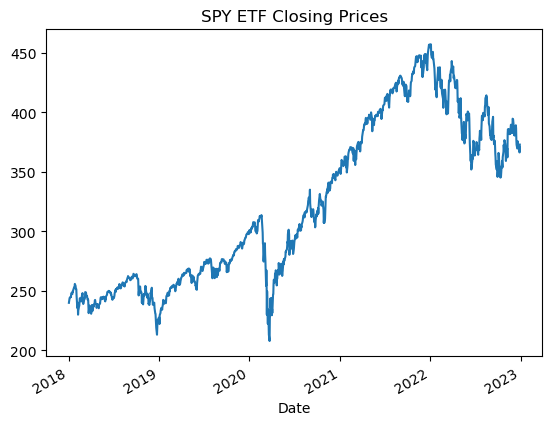

In [45]:
equity.plot()
plt.title("SPY ETF Closing Prices")

Text(0.5, 1.0, 'Invesco DB Oil Fund Closing Prices')

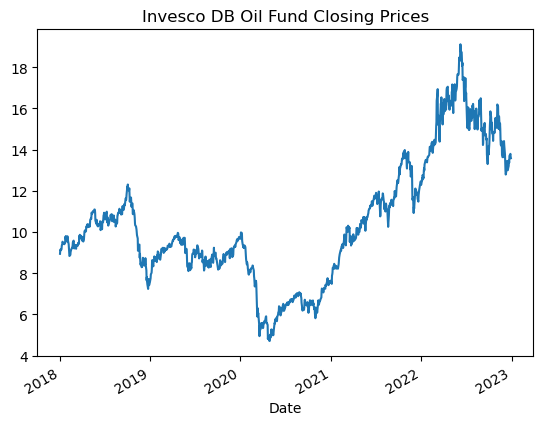

In [47]:
crude_oil.plot()
plt.title("Invesco DB Oil Fund Closing Prices")

Text(0.5, 1.0, 'Gold ETF Closing Prices')

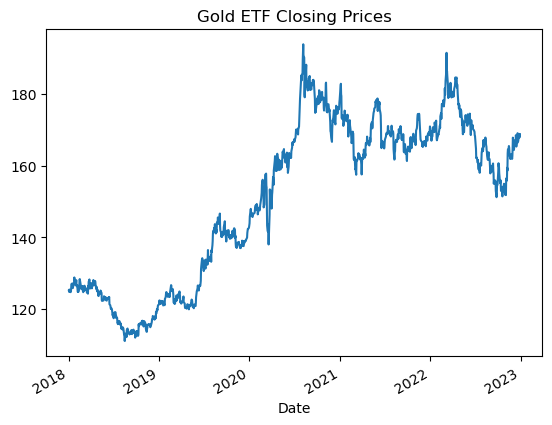

In [49]:
gold.plot()
plt.title("Gold ETF Closing Prices")

Upon inspection, we can see that while all 3 ETFs see an overall rise in their prices over time, the gold ETF rises during the period around 2020-2021, when the first wave of covid struck. The equity and the oil ETFs see a dip in this same period.

Let us have a look at the skew and the kurtosis of all 3 ETFs

In [67]:
print("The skew and kurtosis in the Equity ETF data is {0} and {1} respectively".format(equity.skew(), equity.kurtosis()))
print("The skew and kurtosis in the Oil ETF data is {0} and {1} respectively".format(crude_oil.skew(), crude_oil.kurtosis()))
print("The skew and kurtosis in the Gold ETF data is {0} and {1} respectively".format(gold.skew(), gold.kurtosis()))

The skew and kurtosis in the Equity ETF data is 0.3148642576827855 and -1.3718462420816209 respectively
The skew and kurtosis in the Oil ETF data is 0.5608546374551544 and -0.30123173111759316 respectively
The skew and kurtosis in the Gold ETF data is -0.2856782617655802 and -1.3784907734707572 respectively


Now, let us check for the stationarity of each series individually

In [70]:
#First, the Equity ETF
adf_result_equity = adfuller(equity)
adf_statistic = adf_result_equity[0] 
p_value = adf_result_equity[1]
used_lags = adf_result_equity[2] 
critical_values = adf_result_equity[4] 

adf_statistic, p_value, used_lags, critical_values

(-1.147395537935118,
 0.695806029767273,
 10,
 {'1%': -3.4356048614183443,
  '5%': -2.8638605461891617,
  '10%': -2.5680054872544145})

In [72]:
#Second, the Oil ETF
adf_result_crude_oil = adfuller(crude_oil)
adf_statistic = adf_result_crude_oil[0] 
p_value = adf_result_crude_oil[1]
used_lags = adf_result_crude_oil[2] 
critical_values = adf_result_crude_oil[4] 

adf_statistic, p_value, used_lags, critical_values

(-0.9698493222320897,
 0.7641016465051824,
 7,
 {'1%': -3.435592223709696, '5%': -2.8638549702604803, '10%': -2.56800251776})

In [74]:
#Finally, the Gold ETF
adf_result_gold = adfuller(gold)
adf_statistic = adf_result_gold[0] 
p_value = adf_result_gold[1]
used_lags = adf_result_gold[2] 
critical_values = adf_result_gold[4] 

adf_statistic, p_value, used_lags, critical_values

(-1.1950359294198727,
 0.6757274759766635,
 5,
 {'1%': -3.4355838322867998,
  '5%': -2.863851267837805,
  '10%': -2.5680005460145554})

None of the three series are stationary.

Let us plot the histrograms for all three series

Text(0.5, 1.0, 'Distribution of Closing Prices of the SPY ETF')

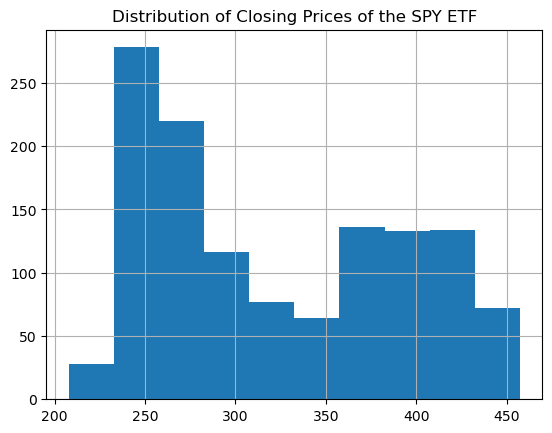

In [80]:
equity.hist()
plt.title("Distribution of Closing Prices of the SPY ETF")

Text(0.5, 1.0, 'Distribution of Closing Prices of the oil ETF')

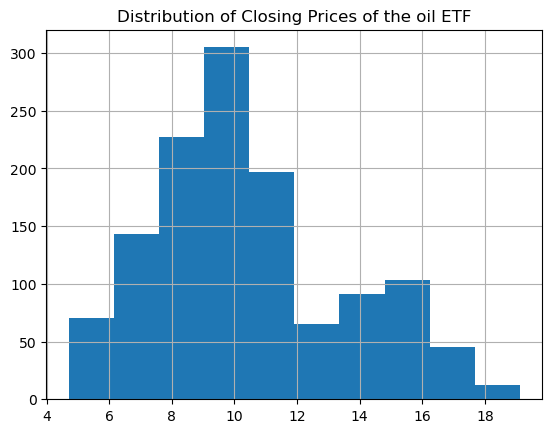

In [82]:
crude_oil.hist()
plt.title("Distribution of Closing Prices of the oil ETF")

Text(0.5, 1.0, 'Distribution of Closing Prices of the Gold ETF')

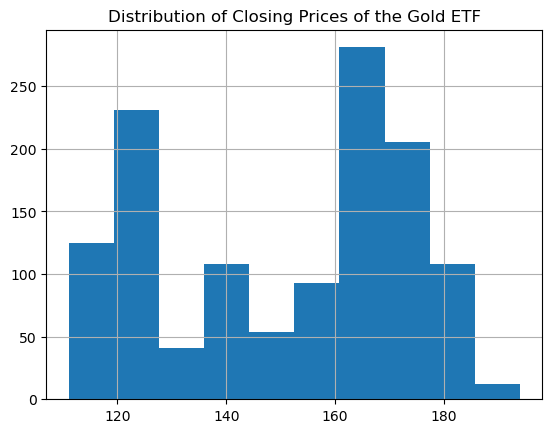

In [84]:
gold.hist()
plt.title("Distribution of Closing Prices of the Gold ETF")

Now, let us look at the scatterplots and the correlations of the series pairwise

In [87]:
gold.corr(equity)

0.7895812284204398

In [89]:
gold.corr(crude_oil)

0.1992443218632013

In [91]:
equity.corr(crude_oil)

0.6053155751440841

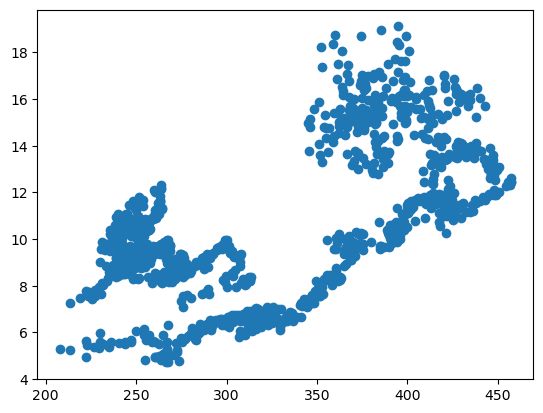

In [93]:
plt.scatter(equity, crude_oil)

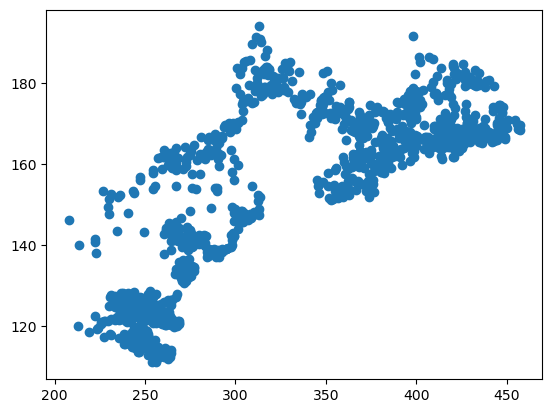

In [95]:
plt.scatter(equity, gold)

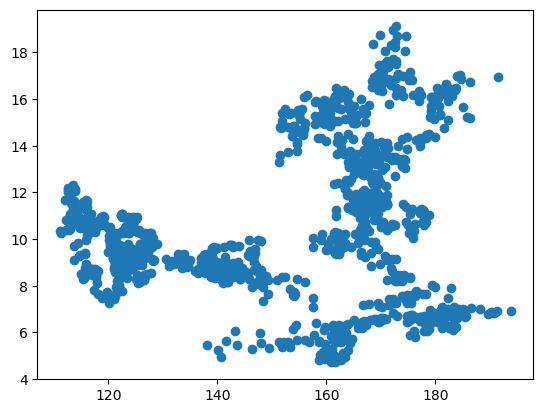

In [97]:
plt.scatter(gold, crude_oil)

## Step 2